University of Wollong (UOW)  
CSCI991 Project Spring 2019  
Team B  

<em>Peng TIAN, pt882@uowmail.edu.au</em>

# Explore RxRx1 Dataset

<br/>
<br/>

<a href='https://www.kaggle.com/c/recursion-cellular-image-classification/'>Recursion Cellular Image Classification</a> is a competition on kaggle<sup>[1]</sup>. The <a href='https://www.kaggle.com/c/recursion-cellular-image-classification/data'>RxRx1 dataset</a> can be downloarded from kaggle <sup>[3]</sup>. More information about the biology of this dataset is provided by <a href='https://www.rxrx.ai/'>RXRX.AI</a><sup>[2]</sup>.

There are 4 types of cell - HUVEC,RPE,HEPG2 and U2OS.

For every type of cell, there are several experiments which are separate into train dataset and test dataset.

For each experiments, 4 384-well plate <sup>[5]</sup> (A-P × 1-24) is used. However, the wells which on the border are abandoned - i.e. just resarching B02 to O23 (B-O × 2-23 = 308). For each well, 2 6-channel image sites are released. 3 types of well are positive_control, negative_control and treatment.

Each channel is a 512×512 gray image. Each well has 6-channel × 2-sites = 12 images.

For train dataset, the values of sirna are given. For test dataset, the values of sirna are NaN which need to be predicted.

<br/>
<br/>

<strong>Biboliagraph:</strong>
<ol>
    <li><a href='https://www.kaggle.com/c/recursion-cellular-image-classification/'>https://www.kaggle.com/c/recursion-cellular-image-classification</a></li>
    <li><a href='https://www.rxrx.ai/'>https://www.rxrx.ai</a></li>
    <li><a href='https://www.kaggle.com/c/recursion-cellular-image-classification/data'>https://www.kaggle.com/c/recursion-cellular-image-classification/data</a></li>
    <li><a href='https://colab.research.google.com/github/recursionpharma/rxrx1-utils/blob/master/notebooks/visualization.ipynb'>https://colab.research.google.com/github/recursionpharma/rxrx1-utils/blob/master/notebooks/visualization.ipynb</a></li>
    <li><a href='https://en.wikipedia.org/wiki/Microplate'>https://en.wikipedia.org/wiki/Microplate</a></li>
</ol>

In [1]:
import sys
import os
import numpy as np
import pandas as pd
from pandas import DataFrame

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import rxrx.io as rio

C:\Users\Peng\Anaconda3\envs\tensorflow_gpuenv 1.13.1\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Peng\Anaconda3\envs\tensorflow_gpuenv 1.13.1\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Peng\Anaconda3\envs\tensorflow_gpuenv 1.13.1\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Peng\Anaco

In [3]:
# Ref:
#     rxrx/io.py, line: 14, 15

LOCAL_IMAGES_BASE_PATH = 'D:\\_peng\\recursion-cellular-image-classification'  # windows
DEFAULT_METADATA_BASE_PATH = LOCAL_IMAGES_BASE_PATH

In [4]:
# train.csv, train_controls.csv, test.csv, test_controls.csv

md = rio.combine_metadata(base_path=DEFAULT_METADATA_BASE_PATH)

In [5]:
md.info

<bound method DataFrame.info of                cell_type dataset experiment  plate   sirna  site well  \
id_code                                                                 
HEPG2-08_1_B02     HEPG2    test   HEPG2-08      1  1138.0     1  B02   
HEPG2-08_1_B02     HEPG2    test   HEPG2-08      1  1138.0     2  B02   
HEPG2-08_1_B03     HEPG2    test   HEPG2-08      1     NaN     1  B03   
HEPG2-08_1_B03     HEPG2    test   HEPG2-08      1     NaN     2  B03   
HEPG2-08_1_B04     HEPG2    test   HEPG2-08      1     NaN     1  B04   
...                  ...     ...        ...    ...     ...   ...  ...   
U2OS-03_4_O21       U2OS   train    U2OS-03      4   824.0     2  O21   
U2OS-03_4_O22       U2OS   train    U2OS-03      4   328.0     1  O22   
U2OS-03_4_O22       U2OS   train    U2OS-03      4   328.0     2  O22   
U2OS-03_4_O23       U2OS   train    U2OS-03      4   509.0     1  O23   
U2OS-03_4_O23       U2OS   train    U2OS-03      4   509.0     2  O23   

                  

In [6]:
md.head()

,cell_type,dataset,experiment,plate,sirna,site,well,well_type
id_code,,,,,,,,
HEPG2-08_1_B02,HEPG2,test,HEPG2-08,1,1138.0,1,B02,negative_control
HEPG2-08_1_B02,HEPG2,test,HEPG2-08,1,1138.0,2,B02,negative_control
HEPG2-08_1_B03,HEPG2,test,HEPG2-08,1,NaN,1,B03,treatment
HEPG2-08_1_B03,HEPG2,test,HEPG2-08,1,NaN,2,B03,treatment
HEPG2-08_1_B04,HEPG2,test,HEPG2-08,1,NaN,1,B04,treatment


<strong>Cell Type</strong>

In [7]:
md['cell_type'].value_counts()

HUVEC    59050
HEPG2    27094
RPE      27070
U2OS     12296
Name: cell_type, dtype: int64

<strong>Experiments for training and testing</strong>

In [8]:
md[md['sirna'].notnull()]['cell_type'].value_counts()  #  train dataset has value of sirna

HUVEC    41358
RPE      18236
HEPG2    18236
U2OS      7886
Name: cell_type, dtype: int64

In [9]:
md[md['sirna'].isnull()]['cell_type'].value_counts()  # test dataset

HUVEC    17692
HEPG2     8858
RPE       8834
U2OS      4410
Name: cell_type, dtype: int64

<strong>Plate</strong>

In [10]:
md['plate'].value_counts()

3    31380
1    31380
2    31378
4    31372
Name: plate, dtype: int64

<strong>Well</strong>

In [11]:
DataFrame(md['well'].value_counts()).sort_index()

,well
B02,408
B03,408
B04,408
B05,408
B06,408
...,...
O19,408
O20,408
O21,408
O22,406


<strong>Site</strong>

In [12]:
md['site'].value_counts()

2    62755
1    62755
Name: site, dtype: int64

<strong>Image</strong>

In [13]:
# pixel_stats.csv
# row 1-6
# train set, experiment HEPG2-01, plate 1, well B02, site 1

t = rio.load_site('train', 'HEPG2-01', 1, 'B02', 1, base_path=LOCAL_IMAGES_BASE_PATH)

t.shape

(512, 512, 6)

In [14]:
img = t[:, :, 0]  # channel 1

img.shape

(512, 512)

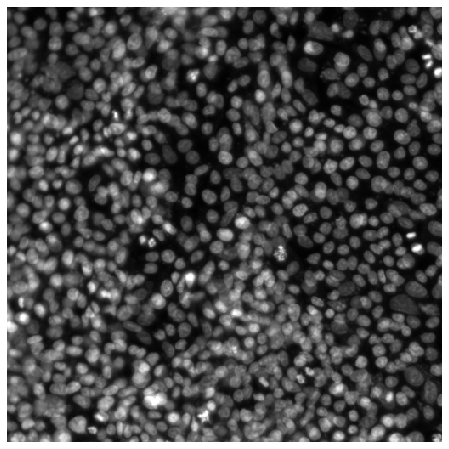

In [15]:
plt.figure(figsize=(8, 8))
plt.axis('off')

_ = plt.imshow(img, cmap='gray')

In [16]:
print('mean\t\t', 'std\t\t', 'median\t', 'min\t', 'max')
print('{0:.8f} \t {1:.8f} \t {2:.1f} \t {3:d} \t {4:d}'.format(np.mean(img),
                                                               np.std(img), np.median(img), np.min(img), np.max(img)))

mean		 std		 median	 min	 max
71.06378174 	 43.14624020 	 67.0 	 7 	 255


<em>Pixel statistics are provied in  pixel_stats.csv :</em>

In [17]:
# pixel_stats.csv

df_pixel_stats = pd.read_csv(os.path.join(DEFAULT_METADATA_BASE_PATH, 'pixel_stats.csv'))

df_pixel_stats.head(n=12)

,id_code,experiment,plate,well,site,channel,mean,std,median,min,max
0,HEPG2-01_1_B02,HEPG2-01,1,B02,1,1,71.063782,43.146240,67.0,7,255
1,HEPG2-01_1_B02,HEPG2-01,1,B02,1,2,32.174431,9.384594,31.0,6,98
2,HEPG2-01_1_B02,HEPG2-01,1,B02,1,3,61.836025,23.377997,59.0,11,255
3,HEPG2-01_1_B02,HEPG2-01,1,B02,1,4,56.983257,16.011435,56.0,11,156
4,HEPG2-01_1_B02,HEPG2-01,1,B02,1,5,91.671993,39.221836,85.0,13,255
5,HEPG2-01_1_B02,HEPG2-01,1,B02,1,6,49.634388,15.679836,48.0,10,255
6,HEPG2-01_1_B02,HEPG2-01,1,B02,2,1,82.357124,50.325000,78.0,7,255
7,HEPG2-01_1_B02,HEPG2-01,1,B02,2,2,36.477859,12.262208,35.0,6,105
8,HEPG2-01_1_B02,HEPG2-01,1,B02,2,3,66.095657,26.406399,62.0,10,255
9,HEPG2-01_1_B02,HEPG2-01,1,B02,2,4,65.378601,23.236740,62.0,9,188


<strong>Train dataset and test dataset</strong>

In [18]:
md_train = md[md['sirna'].notnull()]

In [19]:
md_train

,cell_type,dataset,experiment,plate,sirna,site,well,well_type
id_code,,,,,,,,
HEPG2-08_1_B02,HEPG2,test,HEPG2-08,1,1138.0,1,B02,negative_control
HEPG2-08_1_B02,HEPG2,test,HEPG2-08,1,1138.0,2,B02,negative_control
HEPG2-08_1_C03,HEPG2,test,HEPG2-08,1,1137.0,1,C03,positive_control
HEPG2-08_1_C03,HEPG2,test,HEPG2-08,1,1137.0,2,C03,positive_control
HEPG2-08_1_C07,HEPG2,test,HEPG2-08,1,1120.0,1,C07,positive_control
...,...,...,...,...,...,...,...,...
U2OS-03_4_O21,U2OS,train,U2OS-03,4,824.0,2,O21,treatment
U2OS-03_4_O22,U2OS,train,U2OS-03,4,328.0,1,O22,treatment
U2OS-03_4_O22,U2OS,train,U2OS-03,4,328.0,2,O22,treatment


In [20]:
md_test = md[md['sirna'].isnull()]

In [21]:
md_test

,cell_type,dataset,experiment,plate,sirna,site,well,well_type
id_code,,,,,,,,
HEPG2-08_1_B03,HEPG2,test,HEPG2-08,1,NaN,1,B03,treatment
HEPG2-08_1_B03,HEPG2,test,HEPG2-08,1,NaN,2,B03,treatment
HEPG2-08_1_B04,HEPG2,test,HEPG2-08,1,NaN,1,B04,treatment
HEPG2-08_1_B04,HEPG2,test,HEPG2-08,1,NaN,2,B04,treatment
HEPG2-08_1_B05,HEPG2,test,HEPG2-08,1,NaN,1,B05,treatment
...,...,...,...,...,...,...,...,...
U2OS-05_4_O21,U2OS,test,U2OS-05,4,NaN,2,O21,treatment
U2OS-05_4_O22,U2OS,test,U2OS-05,4,NaN,1,O22,treatment
U2OS-05_4_O22,U2OS,test,U2OS-05,4,NaN,2,O22,treatment


In [22]:
DataFrame(md_train['experiment'].value_counts()).sort_index()

,experiment
HEPG2-01,2464
HEPG2-02,2464
HEPG2-03,2464
HEPG2-04,2464
HEPG2-05,2464
HEPG2-06,2464
HEPG2-07,2460
HEPG2-08,248
HEPG2-09,248
HEPG2-10,248


In [23]:
DataFrame(md_test['experiment'].value_counts()).sort_index()

,experiment
HEPG2-08,2214
HEPG2-09,2216
HEPG2-10,2216
HEPG2-11,2212
HUVEC-17,2216
HUVEC-18,2214
HUVEC-19,2216
HUVEC-20,2216
HUVEC-21,2216
HUVEC-22,2216


<em id='training_testing'>Summary of train dataset and test dataset in aspect of experiments:</em>

|cell |train|test|
|----:|:--:|:--:|
|HEPG |HEPG2-01 ... HEPG2-11|HEPG2-08 ... HEPG2-11|
|HUVEC|HUVEC-01 ... HUVEC-24|HUVEC-11 ... HUVEC-24|
|RPE  |RPE-01 ... RPE-11|RPE-08 ... RPE-11|
|U2OS |U2OS-01 ... U2OS-05|U2OS-04 ... U2OS-05|